General description: these are the primary donation data analyzed in the paper, "Examining charitable giving in real-world online donations" 
published in Nature Communications in 2019 by Sisco and Weber. Each row represents one donation. 

-------Variables:

amount_donated - the amount donated in US dollars.


campaign_ID - an encrypted identifier for the campaign_ID. You can use this to tell which donations were made to the same campaign but not to trace the raw data back to the unencrypted campaign_ID. The encryption is to protect the privacy of the campaign creators and donors.


category - the category of each campaign.


anonymous - whether or not the donation was made anonymously to the public.


gender - The gender of the current donor. "F" represents female and "M" represents male. These genders were estimated based on the public names of the donors. The algorithm used is provided in the supplementary materials for the paper.

same_last_name - "1" means that the donor and the recipient had the same last name. "0" means that they did not (from what we could infer based on publicly displayed names). 

empathy - "1" means that an expression of empathy was detected in the message left by the current donor. "0" means that no expression of empathy was detected. The algorithm used is provided in the supplementary materials for the paper.


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 1. Data Overview</strong></h3>

In [47]:
# Import the libraries
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy import stats
from statistics import *
from scipy.stats import shapiro
from numpy import mean
from numpy import std

# Modules for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# import code as a function
from src.utils import *

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# set desired matplotlib gloabal figure size
plt.rcParams["figure.figsize"] = (20,10)

In [48]:
# check the version of the main packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  1.21.5
Pandas version:  1.4.2
Python 3.9.12


### Overviewing the Data
* Dimension of the dataset, i.e. the number of rows and columns
* What are the attributes?
* What is the data type of each attribute? And what is its range?

In [49]:
# read csv
df = pd.read_csv('donor_data.csv')
print(f'Dimension of the dataset: number of rows: {df.shape[0]}, number of columns: {df.shape[1]}')
print(f'Informations of the dataset: {df.info()}')

Dimension of the dataset: number of rows: 11999, number of columns: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_donated  11999 non-null  int64  
 1   campaign_ID     11999 non-null  object 
 2   category        11894 non-null  object 
 3   anonymous       11999 non-null  int64  
 4   gender          7133 non-null   object 
 5   same_last_name  11825 non-null  float64
 6   empathy         11999 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 656.3+ KB
Informations of the dataset: None


### -----> OBSERVATION: 

+ The dataset is composed of 11999 rows and 7 columns. 
+ The dataset is composed of 3 types of data: int64, float64 and object. 

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 2. Data common identifier</strong></h3>

In [50]:
df.head(3)

,amount_donated,campaign_ID,category,anonymous,gender,same_last_name,empathy
0,50,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,0,F,0.0,0
1,100,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,0,F,0.0,1
2,10,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,0,M,0.0,0


In [51]:
df.tail(3)

,amount_donated,campaign_ID,category,anonymous,gender,same_last_name,empathy
11996,25,O6D6pB+cgIR2I4snh43BNi6WyGYPNHU=,Community,0,F,0.0,0
11997,50,O6D6pB+cgIR2I4snh43BNi6WyGYPNHU=,Community,1,NaN,0.0,0
11998,25,O6D6pB+cgIR2I4snh43BNi6WyGYPNHU=,Community,0,F,0.0,0


### -------> OBSERVATION:

+ The campaign_ID Seems to be a unique identifier in this dataset
+ There are several attributes appears to be numerical but they indicates binary value, so we still need to treat them as categorical columns

<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 3. Data Problems</strong></h3>

# 1. Data type

In [52]:
# apply the coerce_df_columns_to_best_dtype function to the dataframe
coerce_df_columns_to_best_dtype(df, ['anonymous','same_last_name', 'empathy'])


Number of numeric columns:  4
List of numeric columns:  ['amount_donated', 'anonymous', 'same_last_name', 'empathy'] 

Number of categorical columns:  3
List of string columns:  ['campaign_ID', 'category', 'gender'] 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   amount_donated  11999 non-null  Int64  
 1   campaign_ID     11999 non-null  string 
 2   category        11894 non-null  string 
 3   anonymous       11999 non-null  boolean
 4   gender          7133 non-null   string 
 5   same_last_name  11999 non-null  boolean
 6   empathy         11999 non-null  boolean
dtypes: Int64(1), boolean(3), string(3)
memory usage: 457.1 KB


In [53]:
from pandas_profiling import ProfileReport
profile_train = ProfileReport(df, minimal=True)
profile_train

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### --------> OBSERVATION

+ We only have the `amount_donated` is a continuous numerical column 

+ `gender` has the most missing value (40.6%). This might because some of the people dont want to disclose their gender or the availabel gender did not fit theirs

In [54]:
# describe 
df.amount_donated.describe().T

count    11999.000000
mean        94.636553
std        204.020417
min          2.000000
25%         25.000000
50%         50.000000
75%        100.000000
max       8980.000000
Name: amount_donated, dtype: float64

In [55]:
from matplotlib.cbook import boxplot_stats

filter_data = df.amount_donated[~np.isnan(df.amount_donated)] # have to fliter NaN values before we use the boxplot_stats
stats = boxplot_stats(filter_data)
stats

[{'mean': 94.63655304608717,
  'iqr': 75.0,
  'cilo': 48.92504969036672,
  'cihi': 51.07495030963328,
  'whishi': 211,
  'whislo': 2,
  'fliers': array([ 250,  360,  500, 1000,  250,  250,  250,  500,  500,  250,  250,
          250, 1000,  350,  250,  500, 1000,  250,  500,  500,  300,  500,
          260,  250, 1000,  300,  300,  500,  250, 1000,  500,  500,  235,
          235,  350,  235,  320,  335,  400,  250,  335,  335,  235,  235,
          235,  255, 2500,  500,  250,  400,  500,  250,  500,  500,  400,
          250,  250,  250,  250,  500,  250,  500,  500,  250,  250,  300,
          250,  300,  400,  250,  500,  500,  270,  500,  500,  500,  500,
          500, 1000,  500,  500,  500,  600,  250,  250,  250,  250,  300,
          250,  250,  500,  525,  400,  250,  500, 1000, 1000,  500, 1000,
         2500,  500,  500,  500, 5000,  500,  734, 1700,  300,  250,  300,
          500,  250,  250,  250,  500,  330,  300,  500,  300,  500,  300,
          250,  500,  300,  250

### ------> OBSERVATION

The 'fliers' are outliers. 
I can see some an outlier values in `amount_donated`. Let's investigate them further to see if they are real outliers

# Visualize the `amount_donated` Outliers

<AxesSubplot:>

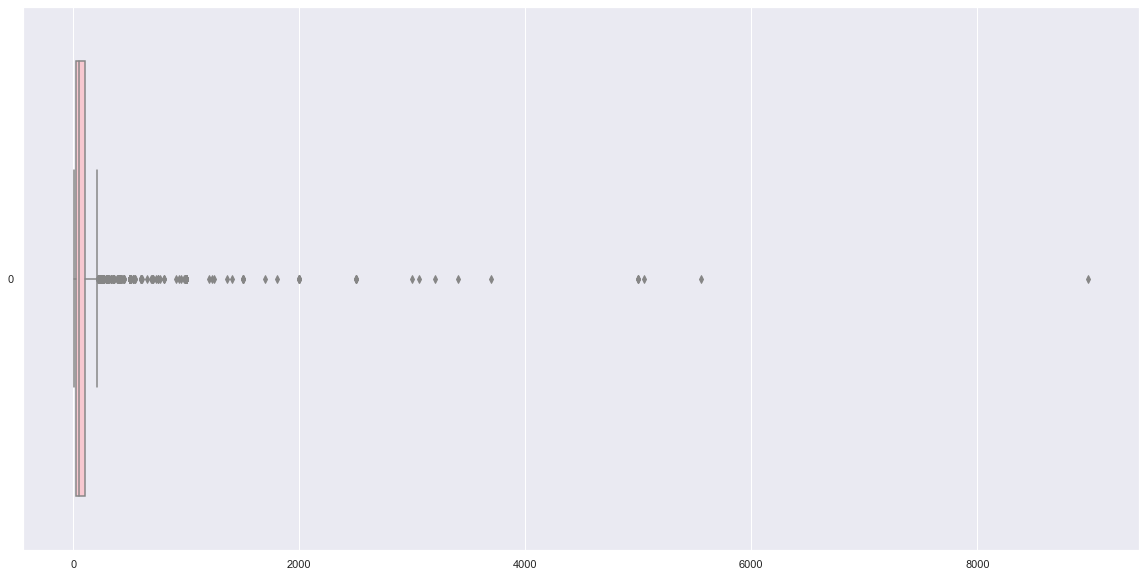

In [56]:
# boxplot after removing outliers
sns.boxplot(data=df.amount_donated,orient="h",color="pink")

# Missing values

find the best imputation or drop techniques

In [57]:
missing_percentage(df)

,Total,Percent
gender,4866,40.55
category,105,0.88


In [58]:
# NUmber of missing values in each column
df.isnull().sum()

amount_donated       0
campaign_ID          0
category           105
anonymous            0
gender            4866
same_last_name       0
empathy              0
dtype: int64

### -------> OBSERVATION:

+ 2 columns `gender` and `category` have missing value corresponding with 40.55% and 0.88%

+ We can find the similar donor to impute the category
+ We can impute Non-specified value for missing field in gender 

# Check duplication

In [59]:
# check duplication in the dataset and show duplicated rows
print(f'Number of duplicated rows: {df.duplicated().sum()}')
# show duplicated rows
df[df.duplicated()]

Number of duplicated rows: 6936


,amount_donated,campaign_ID,category,anonymous,gender,same_last_name,empathy
5,50,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,False,F,False,False
9,50,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,False,M,False,False
10,50,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,False,NaN,False,False
13,50,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,False,F,False,False
15,50,f3F1j8SbZZZIR/7Y9r8XUS2JwH4JNnU9zxa967TSlCAz,Medical,False,F,False,False
...,...,...,...,...,...,...,...
11992,25,O6D6pB+cgIR2I4snh43BNi6WyGYPNHU=,Community,False,NaN,False,False
11993,25,O6D6pB+cgIR2I4snh43BNi6WyGYPNHU=,Community,False,F,False,False
11995,15,O6D6pB+cgIR2I4snh43BNi6WyGYPNHU=,Community,False,F,False,False
11996,25,O6D6pB+cgIR2I4snh43BNi6WyGYPNHU=,Community,False,F,False,False


In [60]:
# condition = df.duplicated(['campaign_ID','category','same_last_name'], keep=False)
# # see the duplicated rows with the condition above
# df[condition]

In [61]:
# # drop duplicated rows
# df.drop_duplicates(inplace=True)
# # check the number of rows after dropping duplicated rows
# print(f'Number of rows after dropping duplicated rows: {df.shape[0]}')

In [62]:
# check speeling for similarity between rows in categorical columns
print(f'Number of unique values in the category column: {df.category.nunique()}')
print(f'Frequency of each category in descending order:\n{df.category.value_counts()}')

Number of unique values in the category column: 20
Frequency of each category in descending order:
Sandy                6273
Medical              2520
Alberta Fires         906
Charity               430
Sports                341
Family                258
Business              229
Events                213
Creative              136
Education             127
Nepal                 121
Volunteer              68
Community              62
Philippine Relief      54
Newlyweds              52
US Storms              37
Travel                 27
Faith                  19
Ecuador                15
Emergencies             6
Name: category, dtype: int64


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Task 3. Data Visulization </strong></h3>

# Pearson Correlation (Relationship between all variables)

Strength of the relationship between two variables
Lets look at correlation between all features.

Correlation between the last name column and the other columns:
                amount_donated  anonymous  same_last_name   empathy
amount_donated        1.000000   0.037193        0.007369  0.004352
anonymous             0.037193   1.000000       -0.033069 -0.099264
same_last_name        0.007369  -0.033069        1.000000 -0.004065
empathy               0.004352  -0.099264       -0.004065  1.000000


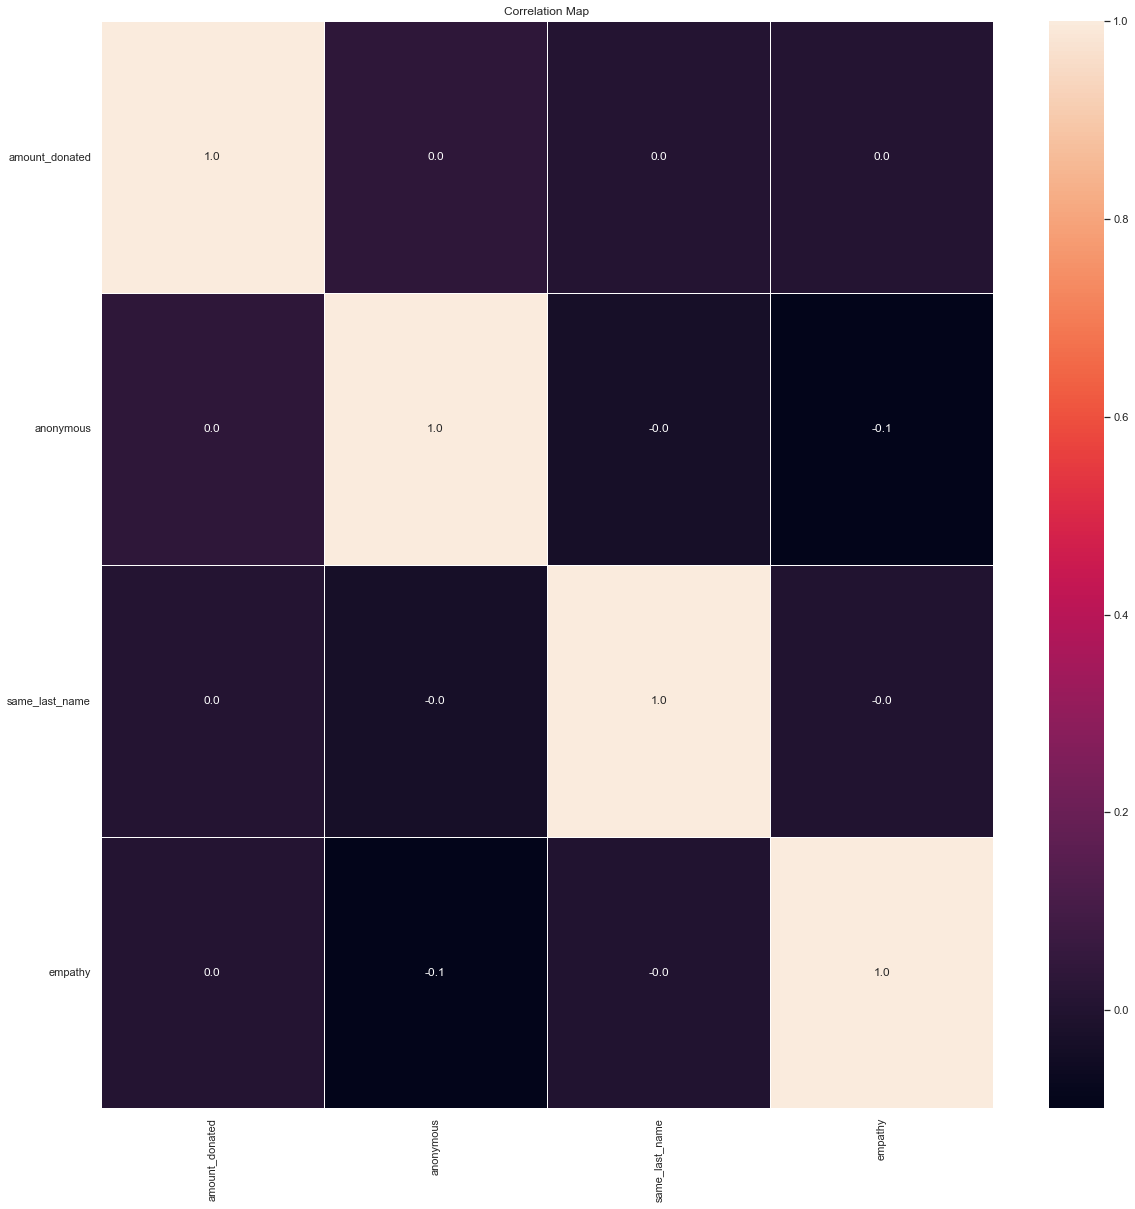

In [63]:
# correlation between the same last name and other columns
print(f'Correlation between the last name column and the other columns:\n{df.corr()}')

f,ax=plt.subplots(figsize = (20,20))
sns.heatmap(df.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('heatmap to indicates correlation between variables.png')
plt.show()

### ------> OBSERVATION

+ There is no strong correlation between variables of the dataset

# Relationship between gender and the amount donated?

## Histogram

Most common way to represent distribution of varible is histogram that is graph which shows frequency of each value.

Frequency = number of times each value appears

In [64]:
#  Groups & Target Summary Stats
df.groupby("gender").amount_donated.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
gender,,,,,
F,4584,50.0,67.336824,84.514596,1000
M,2549,50.0,103.546489,185.382019,5000


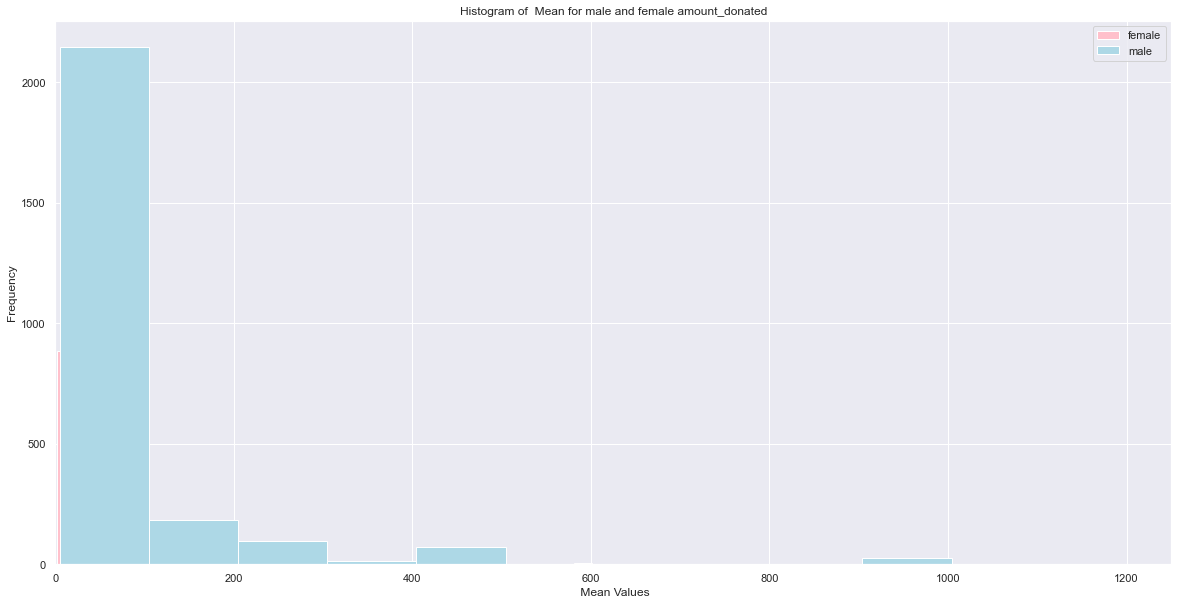

Most frequent female amount_donated mean is:  41.92
Most frequent male amount_donated mean is:  204.8


In [65]:
female = plt.hist(df[df["gender"] == "F"].amount_donated,bins=50,label = "female", color="pink")
male = plt.hist(df[df["gender"] == "M"].amount_donated,bins=50,label = "male", color="lightblue")
plt.legend()
plt.xlabel(" Mean Values")
plt.ylabel("Frequency")
# Scale down the x-axis
plt.xlim(0, 1250)
plt.title("Histogram of  Mean for male and female amount_donated")
plt.savefig('female_male_amount_donated_hist.png')
plt.show()

frequent_amount_donated_mean = female[0].max()
index_frequent_amount_donated_mean = list(female[0]).index(frequent_amount_donated_mean)

most_frequent_female_amount_donated_mean = female[1][index_frequent_amount_donated_mean]
most_frequent_male_amount_donated_mean = male[1][index_frequent_amount_donated_mean]

print("Most frequent female amount_donated mean is: ",most_frequent_female_amount_donated_mean)
print("Most frequent male amount_donated mean is: ",most_frequent_male_amount_donated_mean)

### ----------> OBSERVATION:

We can see that the mean of the male `amount_donated` is more to the right of the graph and higher frequency which indicates male amount_donated is larger amount in general. The distribution of the histogram is right skewed means the true amount of most donators donated less than the mean indicated.

# Normality Test

I need to decide whether to use parametric or nonparametric statistical methods.

The Central Limit Theorem

If n>30, the Central Limit Theorem can be used.

Unlike the normal case, these histograms all differ in shape. In particular, they become progressively less skewed as the sample size n increases.

provide convincing evidence that a sample size of n=30 is sufficient to overcome the skewness of the population distribution and give an approximately normal X sampling distribution.

H₀: The data is normally distributed.
H₁: The data is not normally distributed.
H₀: The variances of the samples are the same.
H₁: The variances of the samples are different.
At α=0.05. If the p-value is >0.05, it can be said that the mean amount_donated is normally distributed.


 mu = 94.64 and sigma = 204.01



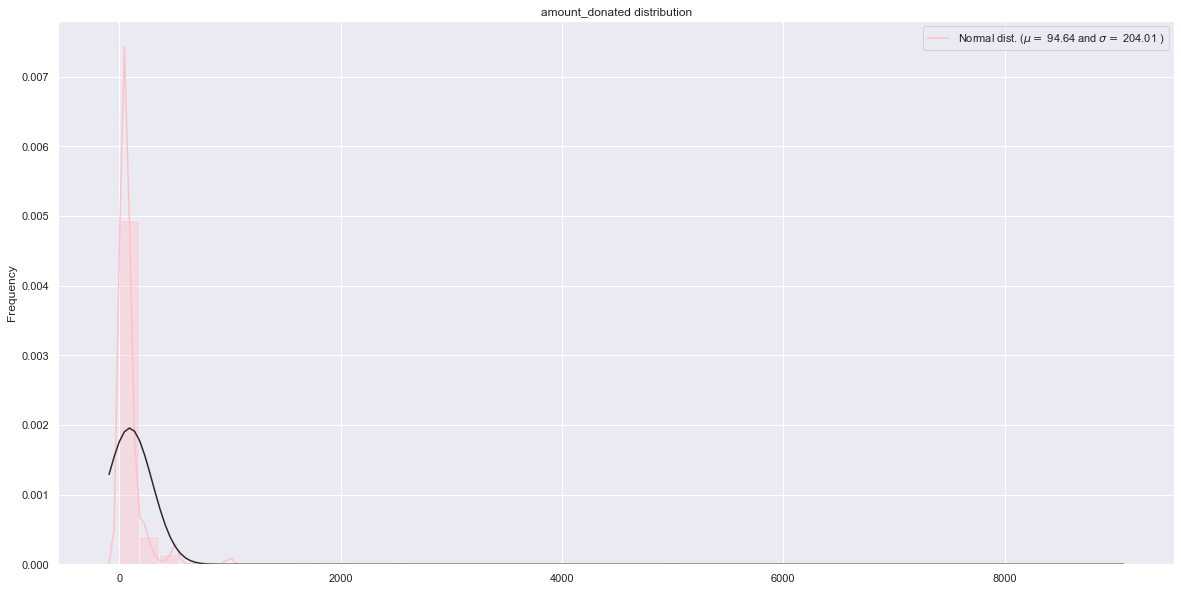

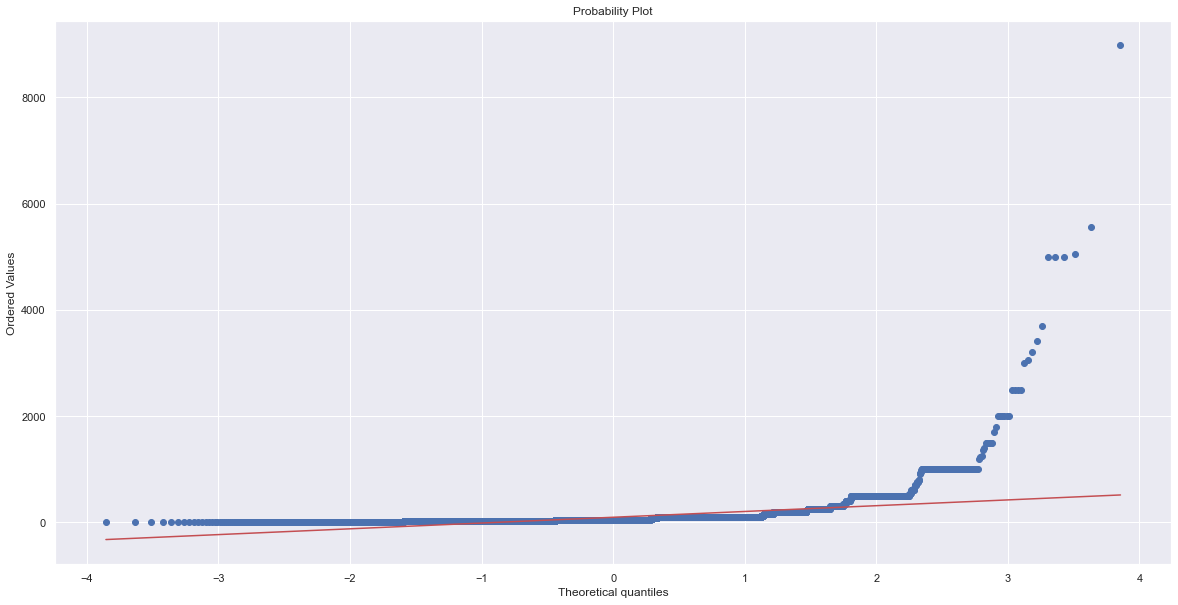

In [66]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


amount_donated = np.array(df['amount_donated'], dtype=float)
sns.distplot(amount_donated , fit=norm,color = 'pink');

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(amount_donated)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('amount_donated distribution')

# Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(amount_donated, plot=plt)
plt.show()

In [67]:
# Select 10 random samples

df2 = df.sample(n=10, random_state=42) # random state is a seed value ensure the reproducibility of the results


# convert specified column in the dataframe into series
population_amount_donated = df['amount_donated'].squeeze()
print('Population mean=%.3f stdv=%.3f' % (mean(population_amount_donated), std(population_amount_donated)))
sample_amount_donated = df2['amount_donated'].squeeze()
print('Sample mean=%.3f stdv=%.3f' % (mean(sample_amount_donated), std(sample_amount_donated)))

Population mean=94.637 stdv=204.012
Sample mean=90.000 stdv=61.441


## Shapiro-Wilk Test

In [68]:
def check_normality_ShapiroWilk(data, data_name):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.3f" % p_value_normality)
    stat, p = shapiro(df.amount_donated)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha_value = 0.05
    print(f"The distribution for the {data_name} amount_donated: ")
    if p_value_normality < alpha_value:
        print(f"The p value is less than alpha {alpha_value} which p is significant -> Reject null hypothesis: The data is NOT normally distributed")
    else:
        print(f"The p value is larger than alpha {alpha_value} which p is not significant -> Fail to reject null hypothesis: The data is normally distributed")
    print(f"\n\n")

check_normality_ShapiroWilk(population_amount_donated, "population_amount_donated")

check_normality_ShapiroWilk(sample_amount_donated, "10 samples")

p value:0.000
Statistics=0.286, p=0.000
The distribution for the population_amount_donated amount_donated: 
The p value is less than alpha 0.05 which p is significant -> Reject null hypothesis: The data is NOT normally distributed



p value:0.006
Statistics=0.286, p=0.000
The distribution for the 10 samples amount_donated: 
The p value is less than alpha 0.05 which p is significant -> Reject null hypothesis: The data is NOT normally distributed





# Check homogeneity of variance using Levene’s test

In [69]:
def check_variance_homogeneity_Levene(group1, group2, group1_name, group2_name):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.3f" % p_value_var)
    alpha_value = 0.05
    print(f"Check homogeneity of variance using Levene’s test between {group1_name} and {group2_name}: ")
    if p_value_var <alpha_value:
        print(f"The p value is less than alpha {alpha_value} which p is significant -> Reject the null hypothesis. The variances of the samples are DIFFERENT because the groups have statistically significant difference in their variability.\n\n")
    else:
        print(f"The p value is larger than alpha {alpha_value} which p is not significant -> Fail to reject the null hypothesis. The variances of the samples are SAME because the groups have non-statistically significant difference in their variability.\n\n")

check_variance_homogeneity_Levene(population_amount_donated, sample_amount_donated, "population amount_donated", "10 samples' amount_donated")

p value:0.696
Check homogeneity of variance using Levene’s test between population amount_donated and 10 samples' amount_donated: 
The p value is larger than alpha 0.05 which p is not significant -> Fail to reject the null hypothesis. The variances of the samples are SAME because the groups have non-statistically significant difference in their variability.




In [70]:
df.columns

Index(['amount_donated', 'campaign_ID', 'category', 'anonymous', 'gender',
       'same_last_name', 'empathy'],
      dtype='object')

# Kruskal Wallis test
non parametric test

Assumptions for the test:

At least one of the two large sample conditions are met.
All the samples are random samples.
All the populations being sampled have the same shaped probability density function, with possibly different means.
The populations are independent.
Hypothesis Testing H0 : μ1 =μ2 =μ3 =···=μk H1 : at least two μi differ.

NOTE: The larger the differences the larger the test statistic H. This is why the test is only an upper tail test.

In [71]:
# Find the Chi-Square Critical Value
import scipy.stats
# find Chi-Square critical value for 2 tail hypothesis tests
alpha = float(0.01)
k = 4
degree_freedom = k-1
print(f'degrees of freedom: {(k-1)}')
# X² for upper tail
print(f'The critical value X²U for the upper tail is {scipy.stats.chi2.ppf(1-alpha, df=degree_freedom)}')


degrees of freedom: 3
The critical value X²U for the upper tail is 11.344866730144373


In [72]:
# Conduct the Kruskal-Wallis Test
result = stats.kruskal(*[df['amount_donated'][df['same_last_name'] == same_last_name] for same_last_name in df.same_last_name.unique()])

# Print the result
print(result)

KruskalResult(statistic=5.189987508207936, pvalue=0.02271737954961619)


In [45]:
# Conduct the Kruskal-Wallis Test
result = stats.kruskal(*[df['amount_donated'][df['empathy'] == empathy] for empathy in df.empathy.unique()])

# Print the result
print(result)

KruskalResult(statistic=41.20503661546272, pvalue=1.3706889201957182e-10)


In [46]:
# Conduct the Kruskal-Wallis Test
result = stats.kruskal(*[df['amount_donated'][df['anonymous'] == anonymous] for anonymous in df.anonymous.unique()])

# Print the result
print(result)

KruskalResult(statistic=1.7408809598405584, pvalue=0.18702724201521487)


### -----> OBSERVATION

The critical value X²U for the upper tail rejection region is 11.344866730144373, using 3 degrees of freedom, so the rejection region is [ 11.34, ∞). Since the test statistic = 41.20503661546272, much larger than 11.34, falls in the rejection region, we reject the null hypothesis. There is evidence to indicate that the three means of the amount donated between expression of empathy either detected or not all the same.


<h3 style="color:#ffc0cb;font-size:50px;font-family:Georgia;text-align:center;"><strong>Summary</strong></h3>

+ We have several data problems like missing value, duplication, and data type.
+ The dataset we have is not representative for all the donors (normality check visually and hypothesis testing)
+ The same last name might be an evidence to indicate that the three means of the amount donated between expression of empathy either detected or not all the same.